# 1. 2002-2004년 U1_U3 유속 자료를 이용해 수심 1500m 아래 western UIG 수송량 계산

## U1, U2, U3, U4, U5 각각의 면적 계산

In [164]:
df_station_m = UIG_station.copy()
df_station_m['m1'] = [1760, 1830, 1690, 1750, 2060]
df_station_m['m2'] = [2090, 2250, 2240, 2130, 2060]
df_station_m

,Station name,Longitude (°E),Latitude (°N),m1,m2
0,U1,131.11,37.397933,1760,2090
1,U2,131.26,37.356567,1830,2250
2,U3(EC1),131.43,37.318933,1690,2240
3,U4,131.66,37.298867,1750,2130
4,U5,131.72,37.294683,2060,2060


### 중간지점 계산

In [165]:
u1 = (UIG_station.iloc[0]['Latitude (°N)'], UIG_station.iloc[0]['Longitude (°E)'])
u2 = (UIG_station.iloc[1]['Latitude (°N)'], UIG_station.iloc[1]['Longitude (°E)'])
u3 = (UIG_station.iloc[2]['Latitude (°N)'], UIG_station.iloc[2]['Longitude (°E)'])
u4 = (UIG_station.iloc[3]['Latitude (°N)'], UIG_station.iloc[3]['Longitude (°E)'])
u5 = (UIG_station.iloc[4]['Latitude (°N)'], UIG_station.iloc[4]['Longitude (°E)'])

u01 = u1[1] - (u2[1] - u1[1])/2
u12 = u1[1] + (u2[1] - u1[1])/2
u23 = u2[1] + (u3[1] - u2[1])/2
u34 = u3[1] + (u4[1] - u3[1])/2
u45 = u4[1] + (u5[1] - u4[1])/2
u56 = u5[1] + (u5[1] - u4[1])/2

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'cross section')

Text(131.11, 1760, '1760')

Text(131.26, 1830, '1830')

Text(131.43, 1690, '1690')

Text(131.66, 1750, '1750')

Text(131.72, 2060, '2060')

Text(131.11, 2090, '2090')

Text(131.26, 2250, '2250')

Text(131.43, 2240, '2240')

Text(131.66, 2130, '2130')

Text(131.72, 2060, '')

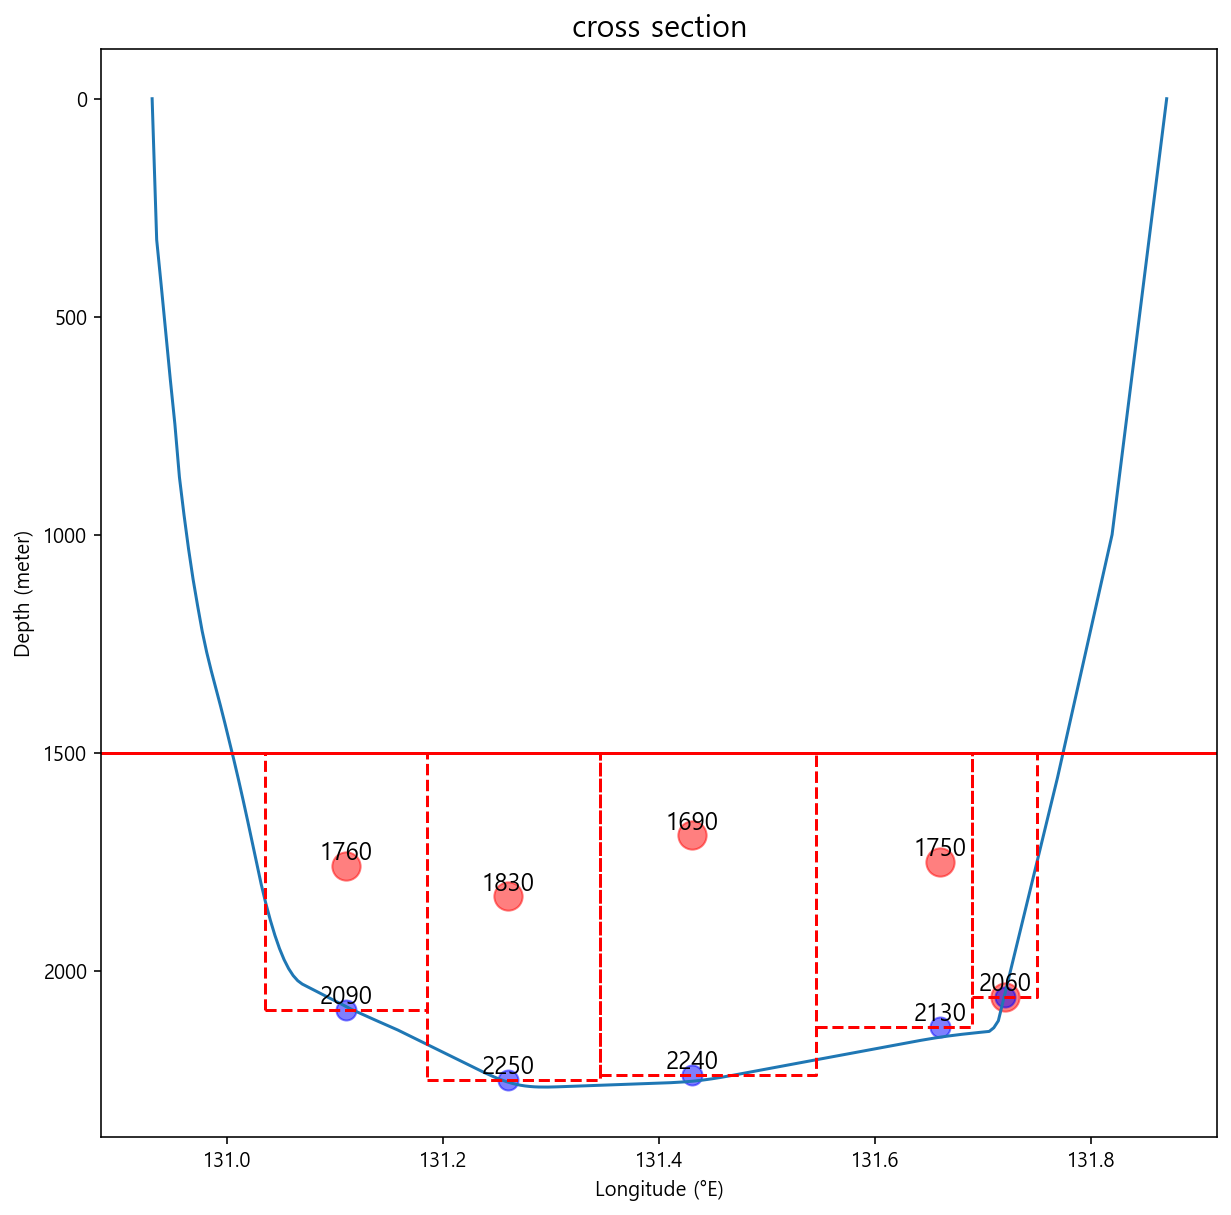

In [166]:
plt.figure(figsize = (10, 10))

p = sns.lineplot(x = UIG_topography['Longitude (°E)'], y = UIG_topography['Depth (meter)']).invert_yaxis()
plt.axhline(y = 1500, color='r', linewidth = 1.5)

plt.plot([u01,u12,u12,u01,u01], [df_station_m.loc[0]['m2'], df_station_m.loc[0]['m2'], 
                                 1500, 1500, df_station_m.loc[0]['m2']], color='r', linestyle='--')
plt.plot([u12,u23,u23,u12,u12], [df_station_m.loc[1]['m2'], df_station_m.loc[1]['m2'],
                                 1500, 1500, df_station_m.loc[1]['m2']],color='r', linestyle='--')
plt.plot([u23,u34,u34,u23,u23], [df_station_m.loc[2]['m2'], df_station_m.loc[2]['m2'],
                                 1500, 1500, df_station_m.loc[2]['m2']],color='r', linestyle='--')
plt.plot([u34,u45,u45,u34,u34], [df_station_m.loc[3]['m2'], df_station_m.loc[3]['m2'],
                                 1500, 1500, df_station_m.loc[3]['m2']], color='r', linestyle='--')
plt.plot([u45,u56,u56,u45,u45], [df_station_m.loc[4]['m2'], df_station_m.loc[4]['m2'],
                                 1500, 1500, df_station_m.loc[4]['m2']], color='r', linestyle='--')

for i in range(len(df_station_m)):
  plt.scatter(x = df_station_m.loc[i]['Longitude (°E)'], y = df_station_m.loc[i]['m1'], color='r',s = 200,alpha = 0.5)
  plt.scatter(x = df_station_m.loc[i]['Longitude (°E)'], y = df_station_m.loc[i]['m2'], color='b',s = 100,alpha = 0.5)
  
n1 = ("1760", "1830", "1690", "1750", "2060")
n2 = ("2090", "2250", "2240", "2130", "")


plt.title("cross section",fontsize = 15)

for i, label in enumerate(n1):
    plt.annotate(label, (df_station_m.loc[i]['Longitude (°E)'], df_station_m.loc[i]['m1']), ha='center', va='bottom', size=12)

for i, label in enumerate(n2):
    plt.annotate(label, (df_station_m.loc[i]['Longitude (°E)'], df_station_m.loc[i]['m2']), ha='center', va='bottom', size=12)

### 가로 길이 계산

In [167]:
U1_U2 = haversine(u1, u2, unit = 'm')
U2_U3 = haversine(u2, u3, unit = 'm')
U3_U4 = haversine(u3, u4, unit = 'm')
U4_U5 = haversine(u4, u5, unit = 'm')

U1_U2_h = U1_U2/2
U2_U3_h = U2_U3/2
U3_U4_h = U3_U4/2
U4_U5_h = U4_U5/2

print(U1_U2)
print(U2_U3)
print(U3_U4)
print(U4_U5)
print('-----------------------------')
print(U1_U2_h)
print(U2_U3_h)
print(U3_U4_h)
print(U4_U5_h)

14029.736940782306
15601.104336761275
20463.72888585193
5327.737514070145
-----------------------------
7014.868470391153
7800.552168380637
10231.864442925966
2663.8687570350726


In [168]:
U1_section_width = U1_U2_h * 2
U2_section_width = U1_U2_h + U2_U3_h
U3_section_width = U2_U3_h + U3_U4_h
U4_section_width = U3_U4_h + U4_U5_h
U5_section_width = U4_U5_h * 2

print(U1_section_width)
print(U2_section_width)
print(U3_section_width)
print(U4_section_width)
print(U5_section_width)

14029.736940782306
14815.42063877179
18032.416611306602
12895.733199961038
5327.737514070145


### 면적 계산

In [169]:
U1_area = U1_section_width * (df_station_m.iloc[0]['m2'] - 1500)
U2_area = U2_section_width * (df_station_m.iloc[1]['m2'] - 1500)
U3_area = U3_section_width * (df_station_m.iloc[2]['m2'] - 1500)
U4_area = U4_section_width * (df_station_m.iloc[3]['m2'] - 1500)
U5_area = U5_section_width * (df_station_m.iloc[4]['m2'] - 1500)

print('U1_area : {} m^2'.format(U1_area))
print('U2_area : {} m^2'.format(U2_area))
print('U3_area : {} m^2'.format(U3_area))
print('U4_area : {} m^2'.format(U4_area))
print('U5_area : {} m^2'.format(U5_area))

U1_area : 8277544.79506156 m^2
U2_area : 11111565.479078842 m^2
U3_area : 13343988.292366885 m^2
U4_area : 8124311.915975454 m^2
U5_area : 2983533.0078792814 m^2


## 수송량 계산

In [170]:
UIG_U1a['transport'] = (UIG_U1a['Ur Current speed (m/s)'] * U1_area)/1000000
UIG_U1a

UIG_U2a['transport'] = (UIG_U2a['Ur Current speed (m/s)'] * U2_area)/1000000
UIG_U2a

UIG_U3a['transport'] = (UIG_U3a['Ur Current speed (m/s)'] * U3_area)/1000000
UIG_U3a

,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s),date,Ur Current speed (m/s),transport
0,2002,11,30,13,0,0,1760,0.000069,2002-11-30 13:00:00,6.916409e-07,0.000006
1,2002,11,30,14,0,0,1760,0.000218,2002-11-30 14:00:00,2.182376e-06,0.000018
2,2002,11,30,15,0,0,1760,0.000531,2002-11-30 15:00:00,5.308476e-06,0.000044
3,2002,11,30,16,0,0,1760,0.001077,2002-11-30 16:00:00,1.077437e-05,0.000089
4,2002,11,30,17,0,0,1760,0.001919,2002-11-30 17:00:00,1.918553e-05,0.000159
...,...,...,...,...,...,...,...,...,...,...,...
11841,2004,4,6,22,0,0,1760,0.106519,2004-04-06 22:00:00,1.065187e-03,0.008817
11842,2004,4,6,23,0,0,1760,-0.092469,2004-04-06 23:00:00,-9.246915e-04,-0.007654
11843,2004,4,7,0,0,0,1760,-0.283257,2004-04-07 00:00:00,-2.832570e-03,-0.023447
11844,2004,4,7,1,0,0,1760,-0.465926,2004-04-07 01:00:00,-4.659258e-03,-0.038567


,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s),date,Ur Current speed (m/s),transport
0,2002,11,30,13,0,0,1830,-0.000004,2002-11-30 13:00:00,-4.011419e-08,-4.457314e-07
1,2002,11,30,14,0,0,1830,-0.000035,2002-11-30 14:00:00,-3.515237e-07,-3.905979e-06
2,2002,11,30,15,0,0,1830,-0.000148,2002-11-30 15:00:00,-1.480414e-06,-1.644971e-05
3,2002,11,30,16,0,0,1830,-0.000406,2002-11-30 16:00:00,-4.062355e-06,-4.513912e-05
4,2002,11,30,17,0,0,1830,-0.000832,2002-11-30 17:00:00,-8.322120e-06,-9.247179e-05
...,...,...,...,...,...,...,...,...,...,...,...
11841,2004,4,6,22,0,0,1830,-5.852380,2004-04-06 22:00:00,-5.852380e-02,-6.502910e-01
11842,2004,4,6,23,0,0,1830,-5.646616,2004-04-06 23:00:00,-5.646616e-02,-6.274275e-01
11843,2004,4,7,0,0,0,1830,-5.445145,2004-04-07 00:00:00,-5.445145e-02,-6.050408e-01
11844,2004,4,7,1,0,0,1830,-5.250342,2004-04-07 01:00:00,-5.250342e-02,-5.833951e-01


,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s),date,Ur Current speed (m/s),transport
0,2002,11,30,13,0,0,1690,0.389712,2002-11-30 13:00:00,0.003897,0.052003
1,2002,11,30,14,0,0,1690,0.415690,2002-11-30 14:00:00,0.004157,0.055470
2,2002,11,30,15,0,0,1690,0.436642,2002-11-30 15:00:00,0.004366,0.058265
3,2002,11,30,16,0,0,1690,0.452170,2002-11-30 16:00:00,0.004522,0.060337
4,2002,11,30,17,0,0,1690,0.461982,2002-11-30 17:00:00,0.004620,0.061647
...,...,...,...,...,...,...,...,...,...,...,...
11841,2004,4,6,22,0,0,1690,-0.536117,2004-04-06 22:00:00,-0.005361,-0.071539
11842,2004,4,6,23,0,0,1690,-0.494862,2004-04-06 23:00:00,-0.004949,-0.066034
11843,2004,4,7,0,0,0,1690,-0.458230,2004-04-07 00:00:00,-0.004582,-0.061146
11844,2004,4,7,1,0,0,1690,-0.427169,2004-04-07 01:00:00,-0.004272,-0.057001


## 수송량 시각화

* U1 구간 수송량

In [171]:
fig = px.line(UIG_U1a, x = UIG_U1a['date'], y = UIG_U1a['transport'])
fig.show()

* U2 구간 수송량

In [172]:
fig = px.line(UIG_U2a, x = UIG_U2a['date'], y = UIG_U2a['transport'])
fig.show()

* U3 구간 수송량

In [173]:
fig = px.line(UIG_U3a, x = UIG_U3a['date'], y = UIG_U3a['transport'])
fig.show()

## 총 수송량

In [174]:
u1_transport = UIG_U1a['transport'].sum()
u2_transport = UIG_U2a['transport'].sum()
u3_transport = UIG_U3a['transport'].sum()

all_transport = u1_transport + u2_transport + u3_transport

print('총수송량(방향 포함) : {}'.format(all_transport))
print('총수송량 : {}'.format(abs(all_transport)))

총수송량(방향 포함) : -2922.619691060501
총수송량 : 2922.619691060501


# 2. 동일 기간의 U3에서 수심 1800m에서의 유속과 (1)에서 얻은 수송량과의 상관관계 산출

## 결측치 확인

## 상관관계 산출

In [175]:
U3_1800

,Station,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s),date,Ur Current speed (m/s)
0,U3(EC1),2002,11,30,13,0,0,1800,0.422855,2002-11-30 13:00:00,0.004229
1,U3(EC1),2002,11,30,14,0,0,1800,NaN,2002-11-30 14:00:00,0.003609
2,U3(EC1),2002,11,30,15,0,0,1800,0.298857,2002-11-30 15:00:00,0.002989
3,U3(EC1),2002,11,30,16,0,0,1800,-0.224372,2002-11-30 16:00:00,-0.002244
4,U3(EC1),2002,11,30,17,0,0,1800,NaN,2002-11-30 17:00:00,-0.000311
...,...,...,...,...,...,...,...,...,...,...,...
11841,U3(EC1),2004,4,6,22,0,0,1800,0.484607,2004-04-06 22:00:00,0.004846
11842,U3(EC1),2004,4,6,23,0,0,1800,NaN,2004-04-06 23:00:00,0.004846
11843,U3(EC1),2004,4,7,0,0,0,1800,NaN,2004-04-07 00:00:00,0.004846
11844,U3(EC1),2004,4,7,1,0,0,1800,NaN,2004-04-07 01:00:00,0.004846


In [176]:
U3_1800['Western_UIG'] = UIG_U1a['transport'] + UIG_U2a['transport'] + UIG_U3a['transport']
U3_1800

,Station,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s),date,Ur Current speed (m/s),Western_UIG
0,U3(EC1),2002,11,30,13,0,0,1800,0.422855,2002-11-30 13:00:00,0.004229,0.052008
1,U3(EC1),2002,11,30,14,0,0,1800,NaN,2002-11-30 14:00:00,0.003609,0.055484
2,U3(EC1),2002,11,30,15,0,0,1800,0.298857,2002-11-30 15:00:00,0.002989,0.058293
3,U3(EC1),2002,11,30,16,0,0,1800,-0.224372,2002-11-30 16:00:00,-0.002244,0.060382
4,U3(EC1),2002,11,30,17,0,0,1800,NaN,2002-11-30 17:00:00,-0.000311,0.061713
...,...,...,...,...,...,...,...,...,...,...,...,...
11841,U3(EC1),2004,4,6,22,0,0,1800,0.484607,2004-04-06 22:00:00,0.004846,-0.713013
11842,U3(EC1),2004,4,6,23,0,0,1800,NaN,2004-04-06 23:00:00,0.004846,-0.701116
11843,U3(EC1),2004,4,7,0,0,0,1800,NaN,2004-04-07 00:00:00,0.004846,-0.689634
11844,U3(EC1),2004,4,7,1,0,0,1800,NaN,2004-04-07 01:00:00,0.004846,-0.678964


### 추세식

In [177]:
z = np.polyfit(U3_1800['Ur Current speed (m/s)'], U3_1800['Western_UIG'], 1)
'y = {0} x {1}'.format(z[0], z[1])

'y = 8.834922816434567 x -0.15934193901064453'

### 결정계수

In [178]:
y = z[0] * np.array(U3_1800['Ur Current speed (m/s)']) + z[1]
r2 = r2_score(U3_1800['Western_UIG'], y)
r2

0.42005482803748473

# 3. 1996년부터 2020년까지 U3 수심 1800m의 유속 자료를 (2)에서 얻은 Ur과 western UIG 수송량과의 상관관계식에 대입

* 유속 nan값 처리

In [179]:
U3['Ur Current speed (m/s)'] = U3['Ur Current speed (m/s)'].interpolate(method="linear")
U3

,Station,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s),date,Ur Current speed (m/s)
0,U3(EC1),1996,11,4,22,0,0,1800,-5.155066,1996-11-04 22:00:00,-0.051551
1,U3(EC1),1996,11,4,23,0,0,1800,-4.947069,1996-11-04 23:00:00,-0.049471
2,U3(EC1),1996,11,5,0,0,0,1800,-5.117618,1996-11-05 00:00:00,-0.051176
3,U3(EC1),1996,11,5,1,0,0,1800,-5.379002,1996-11-05 01:00:00,-0.053790
4,U3(EC1),1996,11,5,2,0,0,1800,-5.536037,1996-11-05 02:00:00,-0.055360
...,...,...,...,...,...,...,...,...,...,...,...
210533,U3(EC1),2020,11,11,3,0,0,1800,-2.731514,2020-11-11 03:00:00,-0.027315
210534,U3(EC1),2020,11,11,4,0,0,1800,-0.510799,2020-11-11 04:00:00,-0.005108
210535,U3(EC1),2020,11,11,5,0,0,1800,-1.223895,2020-11-11 05:00:00,-0.012239
210536,U3(EC1),2020,11,11,6,0,0,1800,0.200796,2020-11-11 06:00:00,0.002008


In [180]:
z[0], z[1]

(8.834922816434567, -0.15934193901064453)

In [181]:
U3['transport'] = z[0] * U3['Ur Current speed (m/s)'] + z[1]
U3

,Station,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s),date,Ur Current speed (m/s),transport
0,U3(EC1),1996,11,4,22,0,0,1800,-5.155066,1996-11-04 22:00:00,-0.051551,-0.614788
1,U3(EC1),1996,11,4,23,0,0,1800,-4.947069,1996-11-04 23:00:00,-0.049471,-0.596412
2,U3(EC1),1996,11,5,0,0,0,1800,-5.117618,1996-11-05 00:00:00,-0.051176,-0.611480
3,U3(EC1),1996,11,5,1,0,0,1800,-5.379002,1996-11-05 01:00:00,-0.053790,-0.634573
4,U3(EC1),1996,11,5,2,0,0,1800,-5.536037,1996-11-05 02:00:00,-0.055360,-0.648447
...,...,...,...,...,...,...,...,...,...,...,...,...
210533,U3(EC1),2020,11,11,3,0,0,1800,-2.731514,2020-11-11 03:00:00,-0.027315,-0.400669
210534,U3(EC1),2020,11,11,4,0,0,1800,-0.510799,2020-11-11 04:00:00,-0.005108,-0.204471
210535,U3(EC1),2020,11,11,5,0,0,1800,-1.223895,2020-11-11 05:00:00,-0.012239,-0.267472
210536,U3(EC1),2020,11,11,6,0,0,1800,0.200796,2020-11-11 06:00:00,0.002008,-0.141602
